In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("Employee.csv")

In [49]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [50]:
df.shape

(4653, 9)

In [51]:
df.size

41877

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [53]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [54]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [55]:
df.duplicated().sum()

1889

In [56]:
df.drop_duplicates(keep='first', inplace=True)

In [57]:
df.shape

(2764, 9)

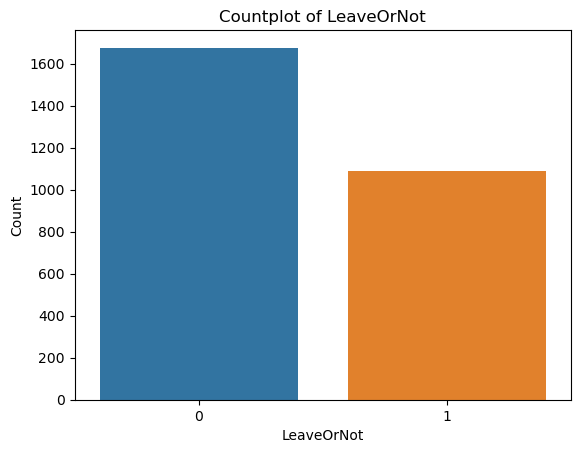

In [58]:
sns.countplot(x='LeaveOrNot', data=df)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Countplot of LeaveOrNot')
plt.show()

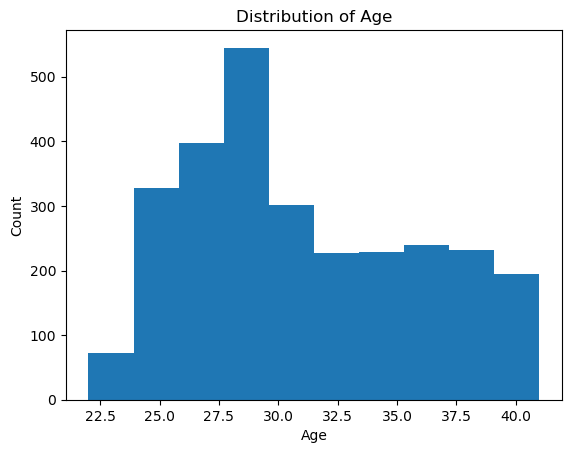

In [59]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

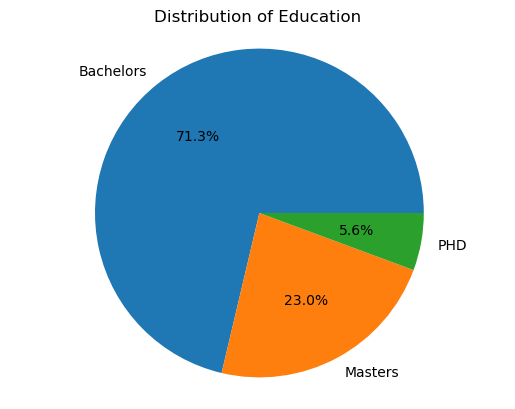

In [60]:
plt.pie(df['Education'].value_counts().values, labels= df['Education'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Education')
plt.axis('equal')
plt.show()

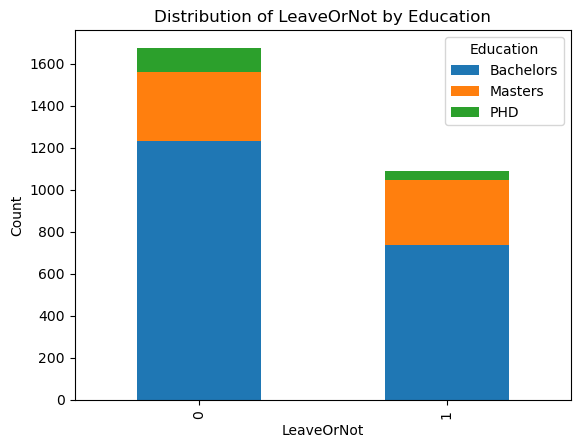

In [61]:
leave_education_counts = df.groupby(['LeaveOrNot', 'Education']).size().unstack()
leave_education_counts.plot(kind='bar', stacked=True)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot by Education')
plt.legend(title='Education')
plt.show()


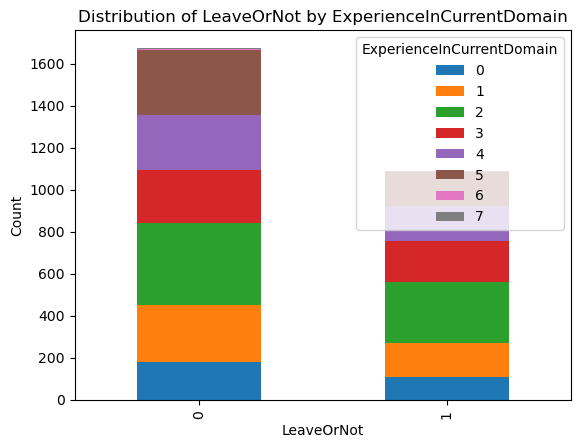

In [62]:
leave_education_counts = df.groupby(['LeaveOrNot', 'ExperienceInCurrentDomain']).size().unstack()
leave_education_counts.plot(kind='bar', stacked=True)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot by ExperienceInCurrentDomain')
plt.legend(title='ExperienceInCurrentDomain')
plt.show()


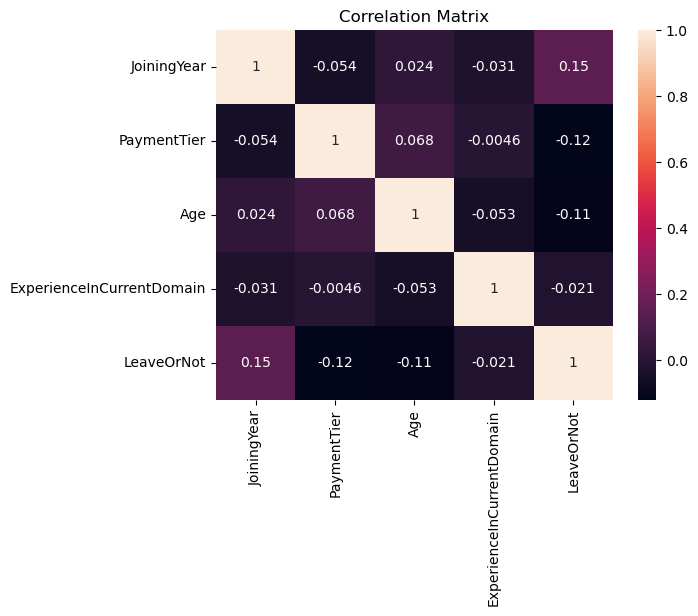

In [63]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [64]:
data = df.copy()

In [65]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype =='object':
        data[col]=le.fit_transform(data[col])

In [67]:
data['JoiningYear'] = le.fit_transform(data['JoiningYear']) 

In [69]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
data['Age'] = mns.fit_transform(data[['Age']])

In [70]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,0.631579,1,0,0,0
1,0,1,2,1,0.315789,0,0,3,1
2,0,2,1,3,0.842105,0,0,2,0
3,1,4,0,3,0.263158,1,0,5,1
4,1,5,2,3,0.105263,1,1,2,1


In [72]:
df1 = data.copy()
df2 = data.copy()

In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
over = SMOTE()
f1 = df1.iloc[:,:8]
t1 = df1.iloc[:,8]
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1676, 1: 1676})

In [75]:
df1 = pd.concat([f1,t1], axis=1)

In [77]:
over = SMOTE()
f2 = df2.iloc[:,:6]
t2 = df2.iloc[:,6]
f2, t2 = over.fit_resample(f2,t2)
Counter(t2)

Counter({0: 2403, 1: 2403})

In [80]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 483.6/483.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 2.1 MB/s eta 0:00:00
     ------------------------------------ 150.0/150.0 kB 212.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 46.4/46.4 kB 583.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 106.8/106.8 kB 2.1 MB/s eta 0:00:00
     -----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [81]:
from pycaret.classification import *
s = setup(data=df1, target='LeaveOrNot', session_id=10, normalize=True, fold=3)

,Description,Value
0,Session id,10
1,Target,LeaveOrNot
2,Target type,Binary
3,Original data shape,"(3352, 9)"
4,Transformed data shape,"(3352, 9)"
5,Transformed train set shape,"(2346, 9)"
6,Transformed test set shape,"(1006, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [82]:
best1 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7869,0.8606,0.7118,0.8375,0.7696,0.5737,0.5803,1.8267
lightgbm,Light Gradient Boosting Machine,0.7745,0.8519,0.7383,0.7959,0.7660,0.5490,0.5505,2.8100
rf,Random Forest Classifier,0.7528,0.8236,0.7332,0.7636,0.7478,0.5055,0.5062,1.9567
et,Extra Trees Classifier,0.7460,0.7629,0.7323,0.7537,0.7424,0.4919,0.4926,1.1900
ada,Ada Boost Classifier,0.7370,0.8078,0.6897,0.7616,0.7235,0.4740,0.4765,0.8400
dt,Decision Tree Classifier,0.7191,0.7267,0.7238,0.7176,0.7205,0.4382,0.4385,0.3933
knn,K Neighbors Classifier,0.6961,0.7732,0.6812,0.7023,0.6915,0.3922,0.3924,10.1400
qda,Quadratic Discriminant Analysis,0.6756,0.7433,0.6454,0.6874,0.6657,0.3512,0.3520,0.3333
nb,Naive Bayes,0.6317,0.6863,0.6326,0.6312,0.6318,0.2634,0.2635,0.2367
ridge,Ridge Classifier,0.6300,0.0000,0.6402,0.6273,0.6336,0.2600,0.2602,0.3833


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [83]:
tuned_model1=tune_model(best1, n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7941,0.8549,0.7161,0.8485,0.7767,0.5882,0.5955
1,0.7941,0.8676,0.7289,0.8382,0.7798,0.5882,0.5933
2,0.7877,0.8627,0.7366,0.8205,0.7763,0.5754,0.5785
Mean,0.7920,0.8618,0.7272,0.8357,0.7776,0.5840,0.5891
Std,0.0030,0.0053,0.0084,0.0116,0.0015,0.0060,0.0076


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


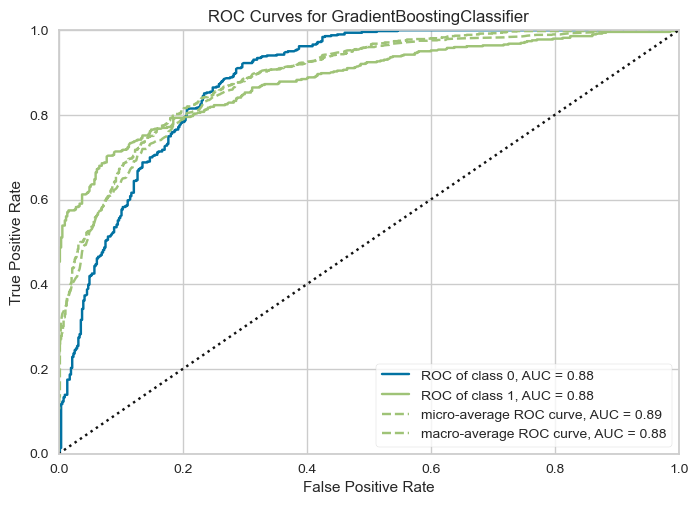

In [84]:
plot_model(tuned_model1, plot = 'auc')

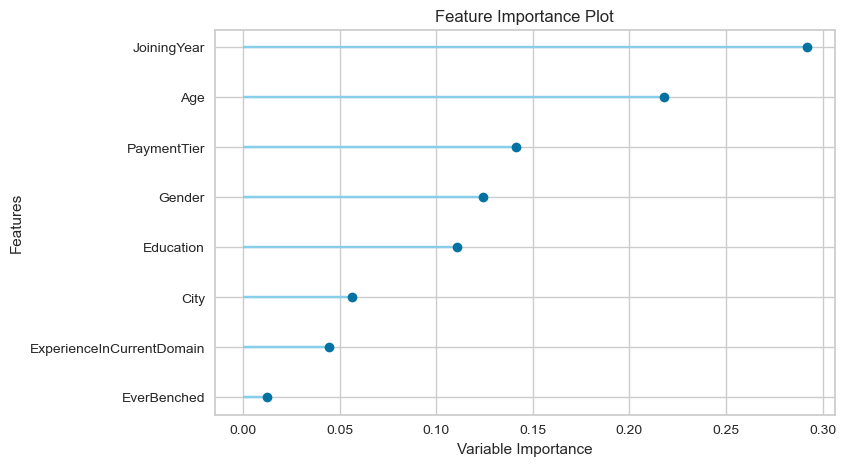

In [85]:
plot_model(tuned_model1, plot='feature')

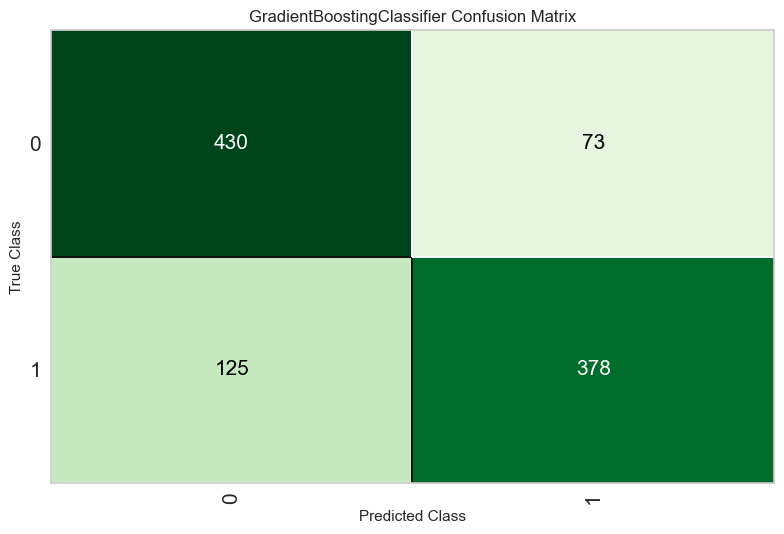

In [86]:
plot_model(tuned_model1, plot = 'confusion_matrix')

In [87]:
from pycaret.classification import *
s = setup(data=df2, target='LeaveOrNot', session_id=10, normalize=True,fold = 3)

,Description,Value
0,Session id,10
1,Target,LeaveOrNot
2,Target type,Binary
3,Original data shape,"(2764, 9)"
4,Transformed data shape,"(2764, 9)"
5,Transformed train set shape,"(1934, 9)"
6,Transformed test set shape,"(830, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [88]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7756,0.8266,0.5756,0.7980,0.6687,0.5057,0.5212,1.6067
rf,Random Forest Classifier,0.7425,0.7766,0.5953,0.7046,0.6453,0.4454,0.4494,2.0333
et,Extra Trees Classifier,0.7425,0.7129,0.6189,0.6939,0.6541,0.4501,0.4521,2.1300
ada,Ada Boost Classifier,0.7342,0.7776,0.5033,0.7381,0.5984,0.4102,0.4271,1.6000
lightgbm,Light Gradient Boosting Machine,0.7291,0.7895,0.5992,0.6762,0.6353,0.4210,0.4230,2.0833
knn,K Neighbors Classifier,0.7213,0.7488,0.5440,0.6840,0.6058,0.3945,0.4009,1.2400
dt,Decision Tree Classifier,0.7001,0.6884,0.6150,0.6196,0.6171,0.3707,0.3709,1.0800
qda,Quadratic Discriminant Analysis,0.6949,0.7315,0.4875,0.6485,0.5560,0.3311,0.3391,1.1000
nb,Naive Bayes,0.6561,0.6701,0.4401,0.5827,0.5012,0.2468,0.2525,1.0833
lr,Logistic Regression,0.6515,0.6609,0.3718,0.5905,0.4560,0.2189,0.2316,1.1233


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [89]:
tuned_model2=tune_model(best2, n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7783,0.8226,0.5276,0.8535,0.6521,0.5023,0.5337
1,0.7938,0.8232,0.5512,0.8805,0.6780,0.5378,0.5698
2,0.7997,0.8299,0.5613,0.8875,0.6877,0.5510,0.5823
Mean,0.7906,0.8252,0.5467,0.8738,0.6726,0.5304,0.5619
Std,0.0090,0.0033,0.0141,0.0147,0.0150,0.0205,0.0206


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


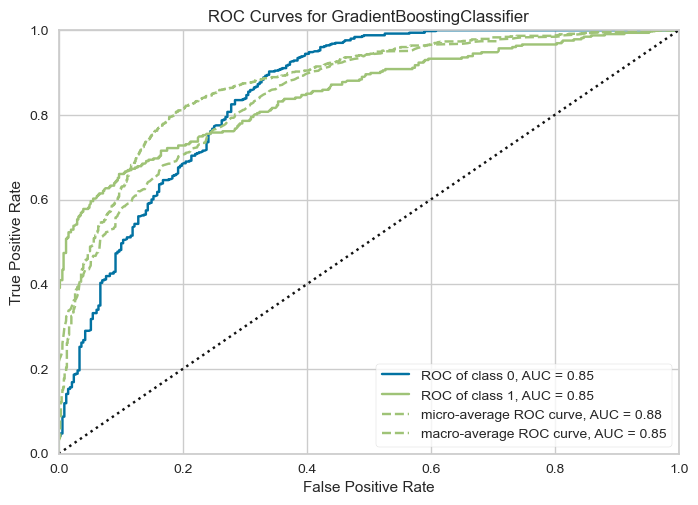

In [90]:
plot_model(tuned_model2, plot = 'auc')

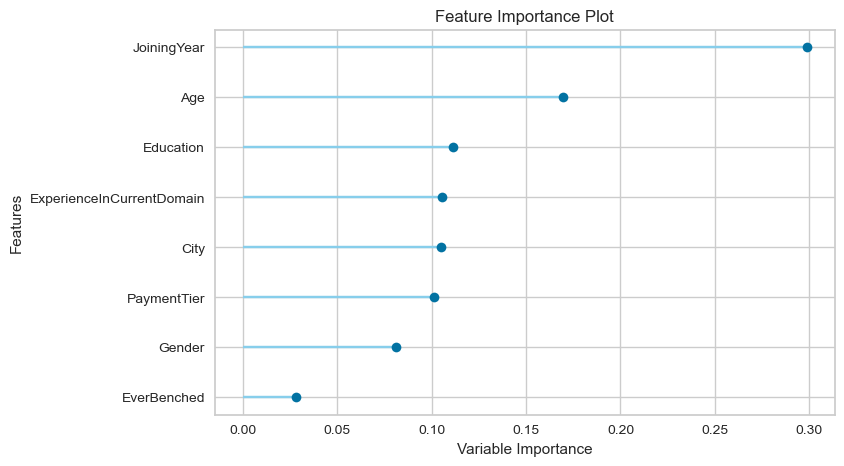

In [91]:
plot_model(tuned_model2, plot='feature')

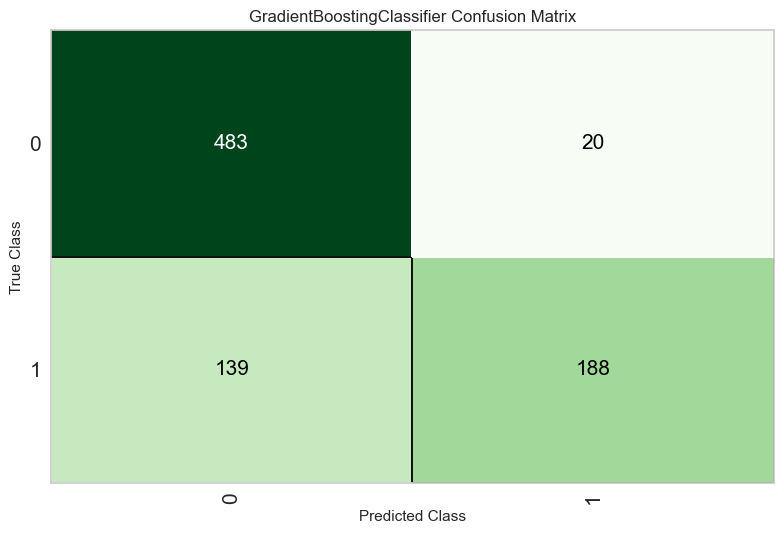

In [92]:
plot_model(tuned_model2, plot = 'confusion_matrix')